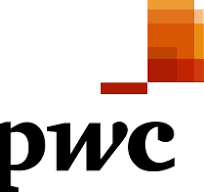

# 📊 Telecom Customer Churn Analysis – PwC Consulting Case Study

## **📌 Background**
The telecom industry is highly competitive, and customers frequently switch providers for better pricing, improved service quality, or enhanced customer experience. The company is losing a significant percentage of customers every month, affecting revenue and profitability. The CEO wants to understand:

- Who are the customers that are churning?
- What factors contribute to churn the most?
- How can the company proactively predict and prevent churn?

PwC has tasked your team with conducting an exploratory data analysis (EDA) on customer demographics and behaviors, followed by building a churn prediction model to identify key risk factors leading to customer churn.

---

## **📈 Phase 1: Understanding the Customer Base**
### **Objective:** Summarize key customer insights

### **1. Churn Percentage**  
- What percentage of customers are leaving?  

### **2. Customer Segments**  
- Analyze customer demographics (Age, Gender, Tenure).  

### **3. Services Used**  
- Do churned customers have **Internet, Phone, or TV services**?  

### **4. Billing & Payment Methods**  
- Do churned customers prefer **paperless billing, credit cards, or bank transfers**?  

### **5. Contract Types**  
- Are **monthly contract customers** churning more than **annual contract customers**?  

---

## **🤖 Phase 2: Predicting Customer Churn**
### **Objective:** Build a churn prediction model to identify at-risk customers.

### **1. Feature Selection**
Identify key factors influencing churn, such as tenure, contract type, payment method, and monthly charges.

### **2. Model Training**
Train a classification model (Logistic Regression, Decision Tree, or XGBoost) to predict churn.

### **3. Performance Evaluation**
Assess model accuracy, precision, recall, F1-score, and AUC-ROC to measure effectiveness.

### **4. Key Insights & Recommendations**
Analyze feature importance, identify top churn drivers, and provide data-driven retention strategies.

### 1. Import the data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
pwc_data = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/02 Churn-Dataset.xlsx")
pwc_data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.5,0,0,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,0,0,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,3,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,0,0,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,0,0,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,0,0,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,Month-to-month,No,Mailed check,29.75,301.9,0,0,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,0,2,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,0,0,No


### 2. Data preparation & Cleaning

In [5]:
pwc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
pwc_data['Churn']

,Churn
0,No
1,No
2,Yes
3,No
4,Yes
...,...
7038,No
7039,No
7040,No
7041,Yes


In [7]:
pwc_data['Churn'] = pwc_data['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

In [8]:
pwc_data['Churn']

,Churn
0,0
1,0
2,1
3,0
4,1
...,...
7038,0
7039,0
7040,0
7041,1


In [9]:
churn_rate = pwc_data['Churn'].mean() * 100
print(f"Churn Percentage: {churn_rate:.4f}%")

Churn Percentage: 26.5370%


### 3. Exploratory Data Analysis

In [10]:
pwc_data.describe()

,SeniorCitizen,tenure,MonthlyCharges,numAdminTickets,numTechTickets,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,0.515689,0.419566,0.265370
std,0.368612,24.559481,30.090047,1.275299,1.250117,0.441561
min,0.000000,0.000000,18.250000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,0.000000,0.000000,0.000000
50%,0.000000,29.000000,70.350000,0.000000,0.000000,0.000000
75%,0.000000,55.000000,89.850000,0.000000,0.000000,1.000000
max,1.000000,72.000000,118.750000,5.000000,9.000000,1.000000


In [11]:
pwc_data['TotalCharges'].describe()
pwc_data['TotalCharges'].value_counts(normalize=True) * 100.head(10)


,count
TotalCharges,
,11
20.2,11
19.75,9
20.05,8
19.9,8
19.65,8
19.55,7
45.3,7
20.15,6


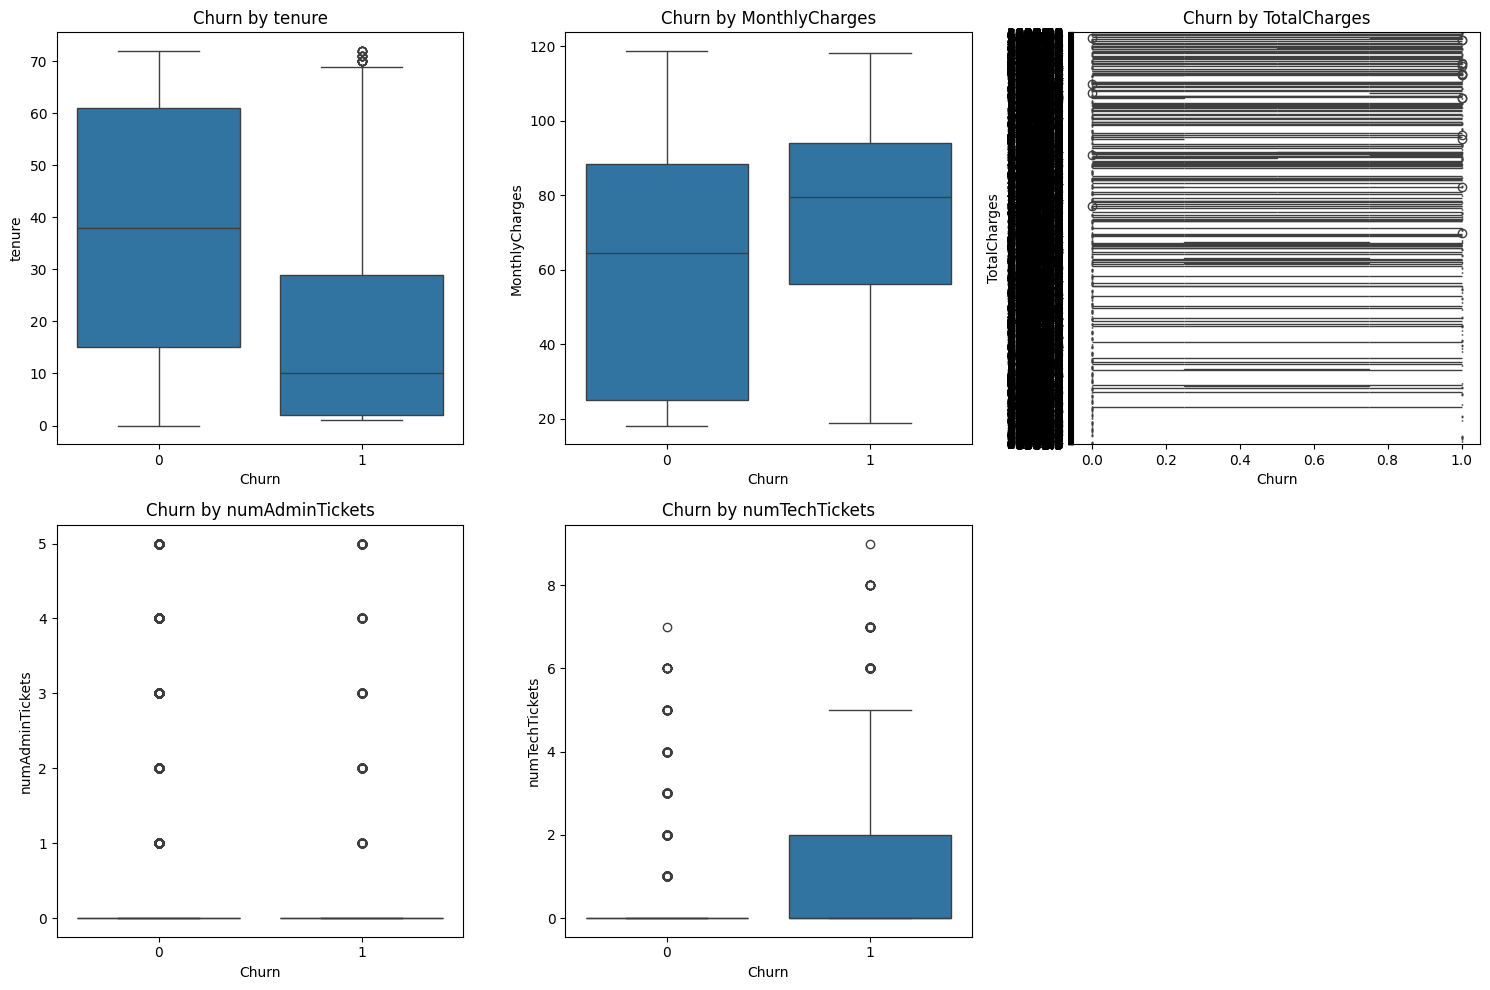

In [12]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges', 'numAdminTickets', 'numTechTickets']
plt.figure(figsize=(15, 10))

for i, column in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='Churn', y=column, data=pwc_data)
    plt.title(f'Churn by {column}')
    plt.xlabel('Churn')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

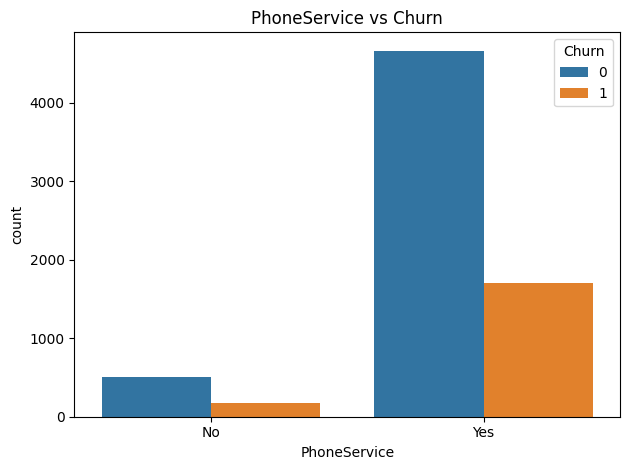

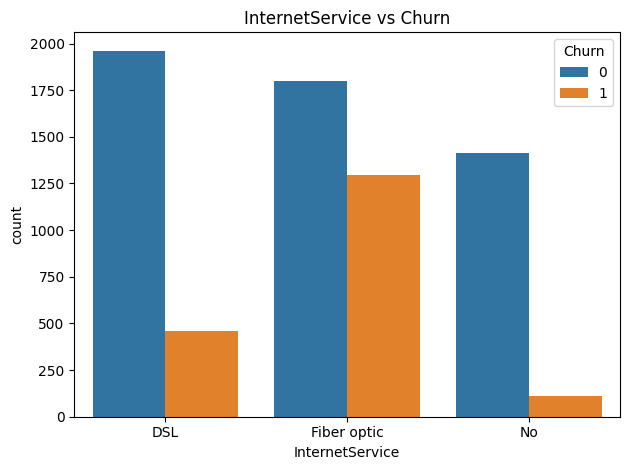

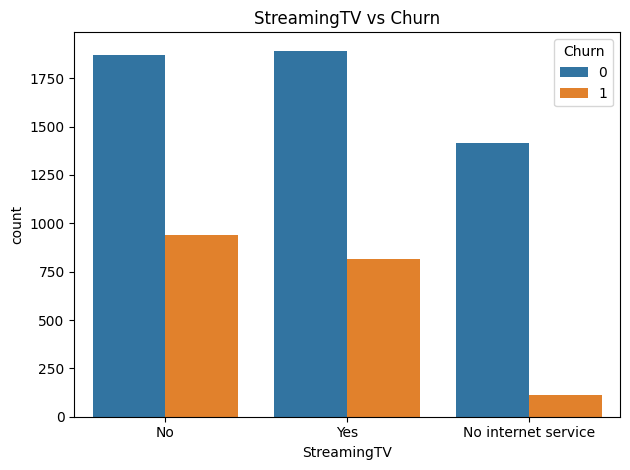

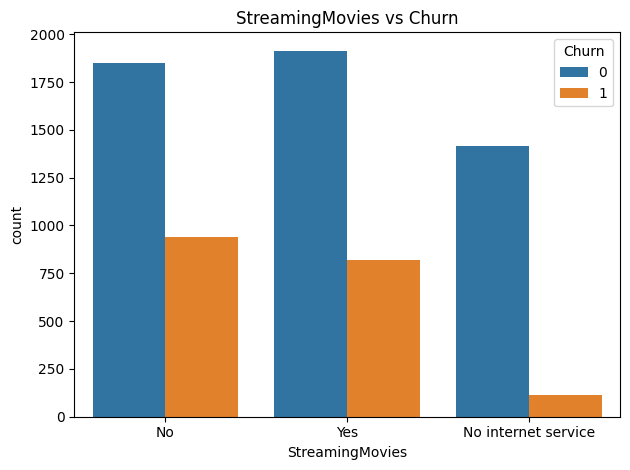

In [13]:
services = ['PhoneService', 'InternetService', 'StreamingTV', 'StreamingMovies']

for service in services:
    sns.countplot(data=pwc_data, x=service, hue='Churn')
    plt.title(f'{service} vs Churn')
    plt.tight_layout()
    plt.show()

# Tip: You could also annotate bars with percentages here for clarity.

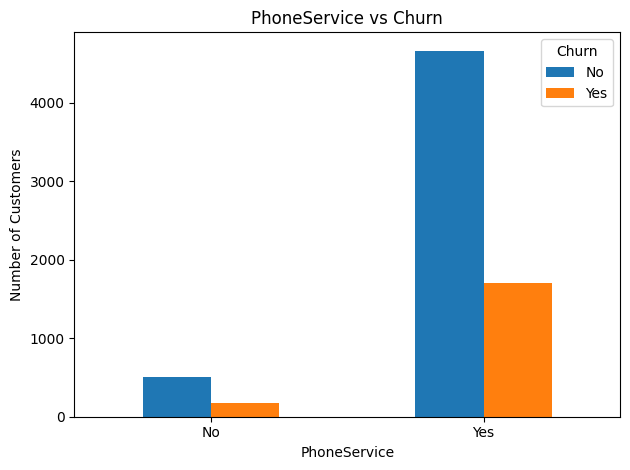

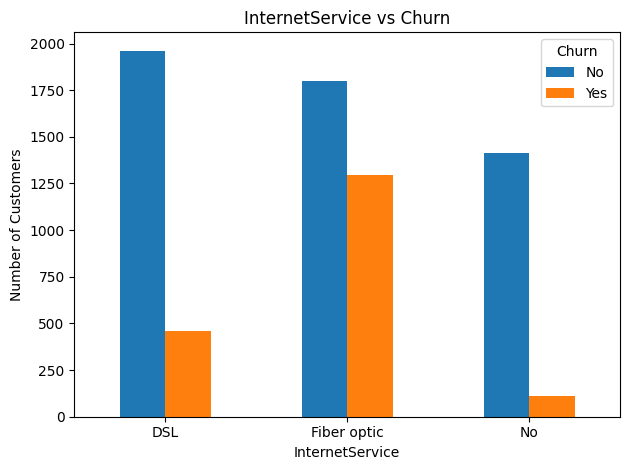

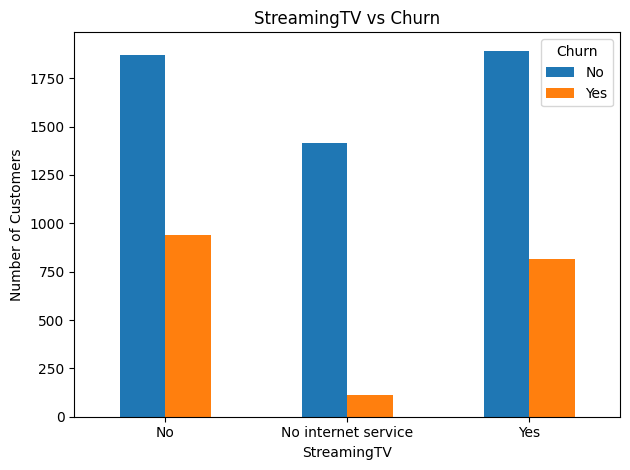

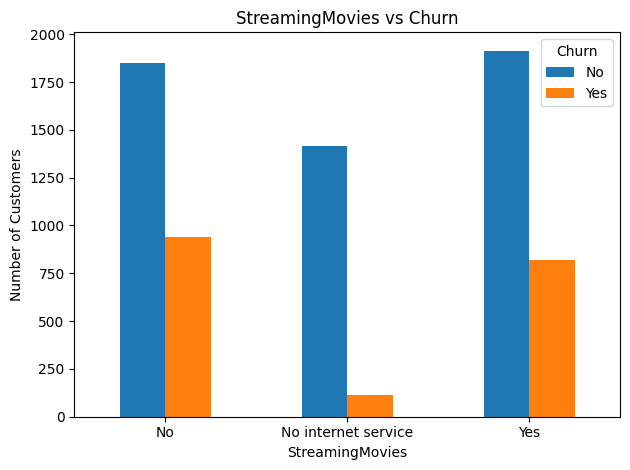

In [14]:
import matplotlib.pyplot as plt

services = ['PhoneService', 'InternetService', 'StreamingTV', 'StreamingMovies']

for service in services:
    churn_counts = pwc_data.groupby([service, 'Churn']).size().unstack()

    churn_counts.plot(kind='bar')
    plt.title(f'{service} vs Churn')
    plt.ylabel('Number of Customers')
    plt.xlabel(service)
    plt.xticks(rotation=0)
    plt.legend(title='Churn', labels=['No', 'Yes'])
    plt.tight_layout()
    plt.show()


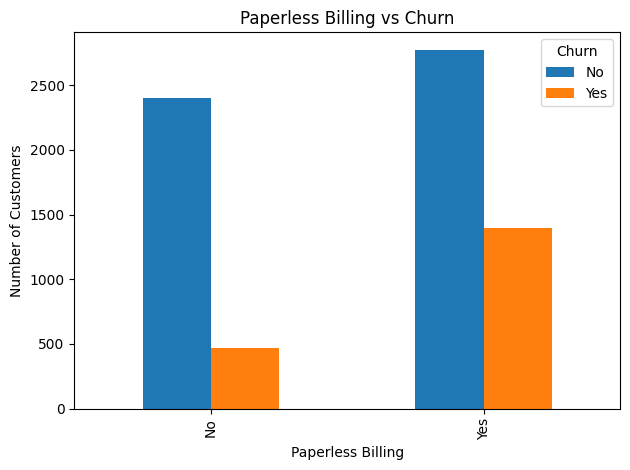

In [15]:
billing_counts = pwc_data.groupby(['PaperlessBilling', 'Churn']).size().unstack()

billing_counts.plot(kind='bar')
plt.title('Paperless Billing vs Churn')
plt.ylabel('Number of Customers')
plt.xlabel('Paperless Billing')

plt.legend(title='Churn', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()


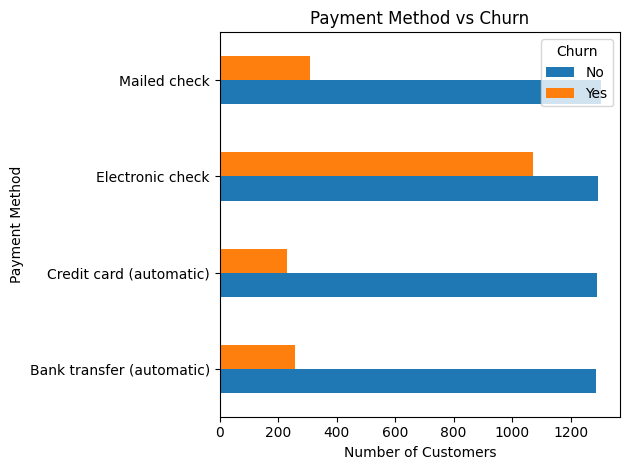

In [16]:
payment_counts = pwc_data.groupby(['PaymentMethod', 'Churn']).size().unstack()

payment_counts.plot(kind='barh')
plt.title('Payment Method vs Churn')
plt.xlabel('Number of Customers')
plt.ylabel('Payment Method')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()


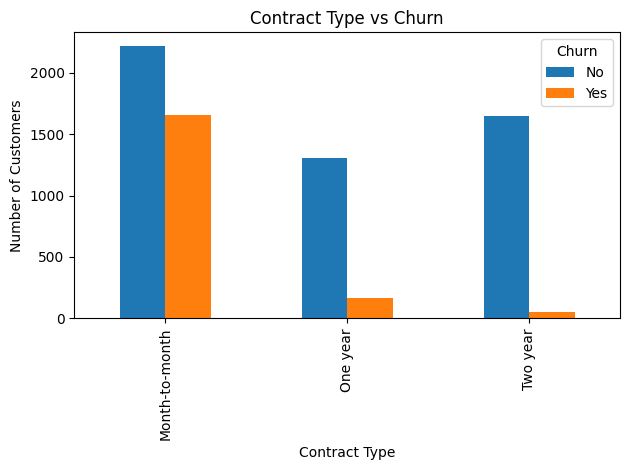

In [17]:
contract_counts = pwc_data.groupby(['Contract', 'Churn']).size().unstack()

contract_counts.plot(kind='bar')
plt.title('Contract Type vs Churn')
plt.ylabel('Number of Customers')
plt.xlabel('Contract Type')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()


### 4. Churn Analysis (Customer demographic analysis)

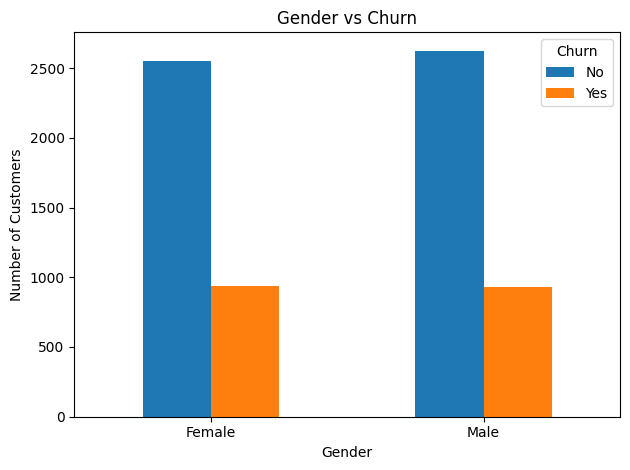

In [18]:
gender_counts = pwc_data.groupby(['gender', 'Churn']).size().unstack()

gender_counts.plot(kind='bar')
plt.title('Gender vs Churn')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()


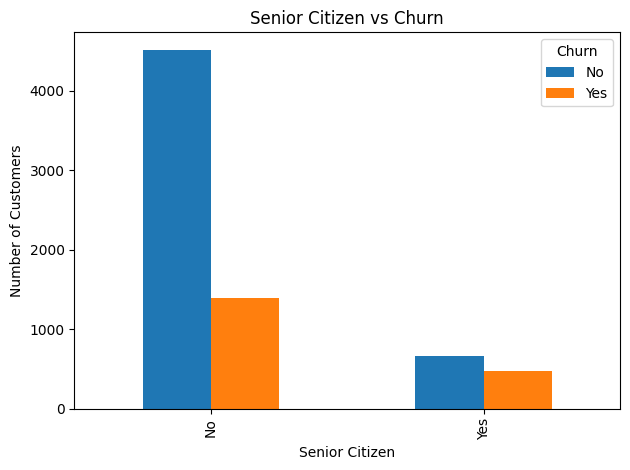

In [19]:
senior_counts = pwc_data.groupby(['SeniorCitizen', 'Churn']).size().unstack()

senior_counts.plot(kind='bar')
plt.title('Senior Citizen vs Churn')
plt.xlabel('Senior Citizen')
plt.ylabel('Number of Customers')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()


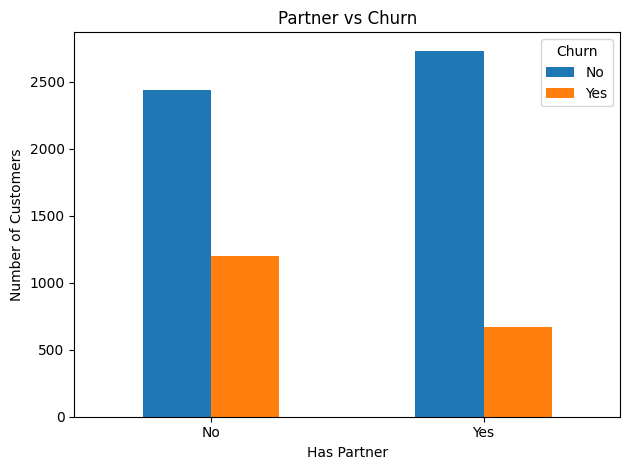

In [20]:
partner_counts = pwc_data.groupby(['Partner', 'Churn']).size().unstack()

partner_counts.plot(kind='bar')
plt.title('Partner vs Churn')
plt.xlabel('Has Partner')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()


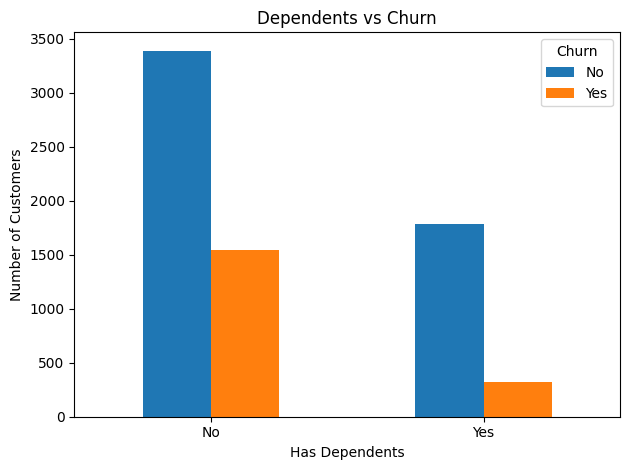

In [21]:
dependents_counts = pwc_data.groupby(['Dependents', 'Churn']).size().unstack()

dependents_counts.plot(kind='bar')
plt.title('Dependents vs Churn')
plt.xlabel('Has Dependents')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()


### 5. Feature Engineering

In [22]:
pwc_data = pwc_data.drop(columns=['customerID'])
pwc_data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'numAdminTickets', 'numTechTickets',
       'Churn'],
      dtype='object')

In [23]:
pwc_data.select_dtypes(include='object').columns


Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'TotalCharges'],
      dtype='object')

In [24]:
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

for col in binary_cols:
    pwc_data[col] = pwc_data[col].str.strip().str.lower().map({'yes': 1, 'no': 0})


In [25]:
multi_cat_cols = ['Contract', 'PaymentMethod', 'InternetService',
                  'StreamingTV', 'StreamingMovies', 'OnlineSecurity',
                  'OnlineBackup', 'DeviceProtection', 'TechSupport', 'MultipleLines']

pwc_data = pd.get_dummies(pwc_data, columns=multi_cat_cols, drop_first=True)


In [26]:
pwc_data['TotalCharges'] = pd.to_numeric(pwc_data['TotalCharges'], errors='coerce')

pwc_data['AvgChargePerMonth'] = pwc_data['TotalCharges'] / (pwc_data['tenure'] + 1)
pwc_data['HasMultipleTickets'] = ((pwc_data['numAdminTickets'] + pwc_data['numTechTickets']) > 1).astype(int)
pwc_data['IsNewCustomer'] = (pwc_data['tenure'] < 3).astype(int)

print(pwc_data[['TotalCharges', 'tenure', 'AvgChargePerMonth']].head())
print(pwc_data[['numAdminTickets', 'numTechTickets', 'HasMultipleTickets']].head())
print(pwc_data[['tenure', 'IsNewCustomer']].head())

   TotalCharges  tenure  AvgChargePerMonth
0         29.85       1          14.925000
1       1889.50      34          53.985714
2        108.15       2          36.050000
3       1840.75      45          40.016304
4        151.65       2          50.550000
   numAdminTickets  numTechTickets  HasMultipleTickets
0                0               0                   0
1                0               0                   0
2                0               0                   0
3                0               3                   1
4                0               0                   0
   tenure  IsNewCustomer
0       1              1
1      34              0
2       2              1
3      45              0
4       2              1


### 6. Modelling

In [27]:
# Drop customerID just in case
pwc_data = pwc_data.drop(columns=['customerID'], errors='ignore')

# Make sure all data is clean
pwc_data['TotalCharges'] = pd.to_numeric(pwc_data['TotalCharges'], errors='coerce')
pwc_data = pwc_data.dropna(subset=['TotalCharges'])

# Create features and label
X = pwc_data.drop(columns=['Churn'])
y = pwc_data['Churn']

# One-hot encode all object columns
X = pd.get_dummies(X, drop_first=True)


In [28]:
print(X.select_dtypes(include='object').columns)


Index([], dtype='object')


In [29]:
from sklearn.model_selection import train_test_split
import numpy as np

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Replace infs and drop NaNs
X_train = X_train.replace([np.inf, -np.inf], np.nan).dropna()
X_test = X_test.replace([np.inf, -np.inf], np.nan).dropna()
y_train = y_train.loc[X_train.index]
y_test = y_test.loc[X_test.index]


In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print("✅ Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\n✅ Classification Report:")
print(classification_report(y_test, y_pred))


✅ Confusion Matrix:
[[1399  150]
 [ 175  386]]

✅ Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.90      0.90      1549
           1       0.72      0.69      0.70       561

    accuracy                           0.85      2110
   macro avg       0.80      0.80      0.80      2110
weighted avg       0.84      0.85      0.84      2110



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


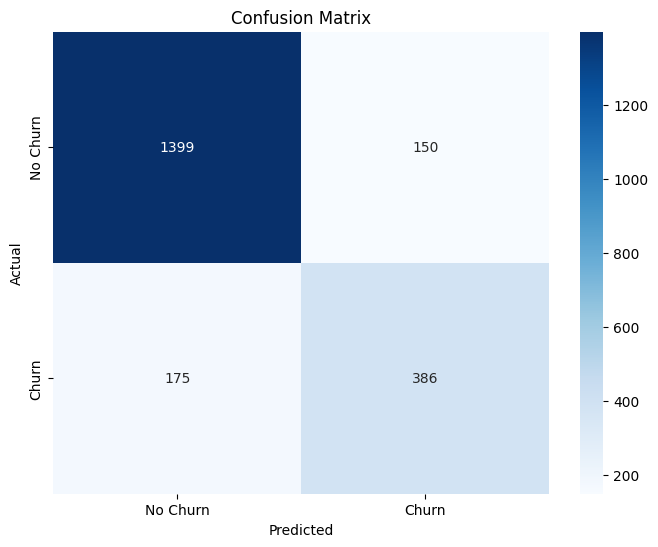

In [31]:
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

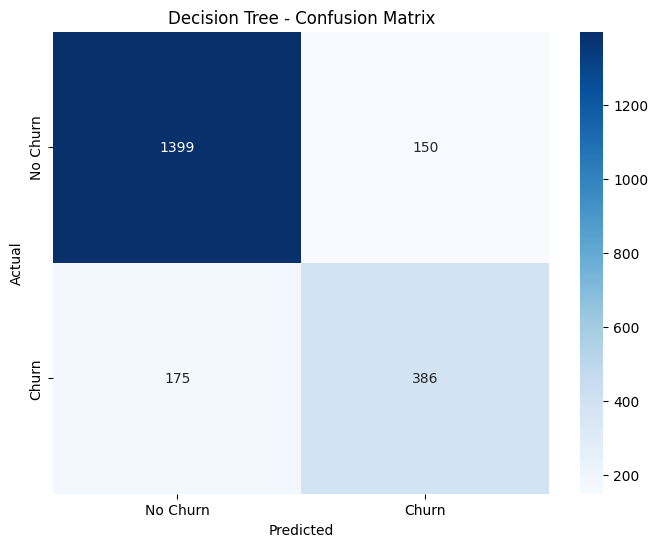

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree

# Initialize the model
dtree = DecisionTreeClassifier(random_state=42)

# Fit the model
dtree.fit(X_train, y_train)

# Predict
y_pred_tree = dtree.predict(X_test)

# Evaluate
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree - Confusion Matrix')
plt.show()

### 7. Model Evaluation

### 8. Insights and Recommendations